In [74]:
from stepmix.stepmix import StepMix
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.metrics import rand_score

import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../data/cleaned_data_SYMPTOMS_9_13_23.csv", index_col=0)
sympdf = df.loc[:, df.columns.str.startswith('Symptom_')]

In [25]:
# patient is a mixture of classes but it's meant to represent probs rather than actual multiple class labels
# so this model is less complex, but it might still be more appropriate, it'll depend

model = StepMix(n_components=8, measurement="binary", verbose=0, random_state=123)


In [26]:
model.fit(sympdf)


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:52<00:00, 52.96s/it, max_LL=-4.22e+5, max_avg_LL=-70]
/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(


StepMix(measurement='binary', n_components=8, random_state=123)

In [17]:
grid = {
    'n_components': [ 5, 6, 7, 8, 9, 10],
}

# no gaussians or whatever, so n_steps can just be 1 

gs = GridSearchCV(estimator=model, cv=3, param_grid=grid, verbose=0)
gs.fit(sympdf)

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.65s/it, max_LL=-2.83e+5, max_avg_LL=-70.5]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.03s/it, max_LL=-2.83e+5, max_avg_LL=-70.4]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:16<00:00, 16.86s/it, max_LL=-2.86e+5, max_avg_LL=-71.1]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:09<00:00,  9.82s/it, max_LL=-2.82e+5, max_avg_LL=-70.2]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.68s/it, max_LL=-2.82e+5, max_avg_LL=-70.1]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:05<00:00,  5.78s/it, max_LL=-2.84e+5, max_avg_LL=-70.7]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:06<00:00,  6.78s/it, max_LL=-2.81e+5, max_avg_LL=-69.9]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:29<00:00, 29.52s/it, max_LL=-2.81e+5, max_avg_LL=-69.8]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:03<00:00,  3.79s/it, max_LL=-2.84e+5, max_avg_LL=-70.5]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:17<00:00, 17.84s/it, max_LL=-2.8e+5, max_avg_LL=-69.8]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:27<00:00, 27.25s/it, max_LL=-2.8e+5, max_avg_LL=-69.6]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:11<00:00, 11.68s/it, max_LL=-2.83e+5, max_avg_LL=-70.4]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:13<00:00, 13.67s/it, max_LL=-2.79e+5, max_avg_LL=-69.5]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:10<00:00, 10.66s/it, max_LL=-2.79e+5, max_avg_LL=-69.4]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:19<00:00, 19.72s/it, max_LL=-2.82e+5, max_avg_LL=-70.2]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:38<00:00, 38.70s/it, max_LL=-2.79e+5, max_avg_LL=-69.3]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:13<00:00, 13.37s/it, max_LL=-2.79e+5, max_avg_LL=-69.3]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:23<00:00, 23.21s/it, max_LL=-2.82e+5, max_avg_LL=-70.1]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:35<00:00, 35.19s/it, max_LL=-4.2e+5, max_avg_LL=-69.7]


GridSearchCV(cv=3,
             estimator=StepMix(measurement='binary', n_components=6,
                               random_state=123),
             param_grid={'n_components': [5, 6, 7, 8, 9, 10]})

In [18]:
results = pd.DataFrame(gs.cv_results_)
results["Val. Log Likelihood"] = results['mean_test_score']

In [19]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_components,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,Val. Log Likelihood
0,8.196204,6.165510,0.031369,0.003565,5,{'n_components': 5},-71.524218,-71.598049,-70.466558,-71.196275,0.516867,6,-71.196275
1,7.120718,1.922051,0.030830,0.010667,6,{'n_components': 6},-71.359334,-71.309572,-70.177150,-70.948686,0.545936,5,-70.948686
2,13.386324,11.478150,0.043562,0.016494,7,{'n_components': 7},-71.084432,-71.209280,-70.009006,-70.767573,0.538804,4,-70.767573
3,18.939157,6.413149,0.050005,0.010650,8,{'n_components': 8},-70.993149,-71.066305,-69.833128,-70.630861,0.564872,3,-70.630861
4,14.698013,3.762890,0.045930,0.019884,9,{'n_components': 9},-70.878908,-70.906330,-69.634635,-70.473291,0.593125,2,-70.473291
5,25.105377,10.429277,0.070942,0.055116,10,{'n_components': 10},-70.720157,-70.865207,-69.621301,-70.402222,0.555360,1,-70.402222


/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_98740/1270231869.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=results, x='param_n_components', y='Val. Log Likelihood',


<Axes: xlabel='param_n_components', ylabel='Val. Log Likelihood'>

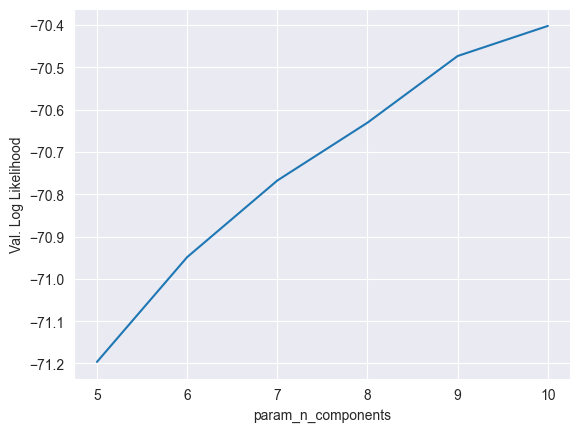

In [21]:
sns.set_style("darkgrid")
sns.lineplot(data=results, x='param_n_components', y='Val. Log Likelihood',
              palette='Dark2')

In [64]:
mm = model.get_mm_df()


/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/stepmix/stepmix.py:1173: FutureWarning: The provided callable <function mean at 0x111c2e8e0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  return pd.pivot_table(


In [65]:
mm = mm.reset_index()


In [66]:
mm  = mm.drop("model_name",axis=1)
mm  = mm.drop("param",axis=1)


In [67]:
mm.index=mm['variable']

In [82]:
print(mm.sort_values(0,ascending=False).head(10).index)
print(mm.sort_values(2,ascending=False).head(10).index)
print(mm.sort_values(3,ascending=False).head(10).index)
print(mm.sort_values(4,ascending=False).head(10).index)
print(mm.sort_values(5,ascending=False).head(10).index)
print(mm.sort_values(6,ascending=False).head(10).index)
print(mm.sort_values(7,ascending=False).head(10).index)


Index(['Symptom_Fatigue', 'Symptom_PEM', 'Symptom_Memory_short',
       'Symptom_Shortness_of_breath',
       'Symptom_Cognitive_Functioning_attentionconcentration',
       'Symptom_Muscle_aches', 'Symptom_Insomnia',
       'Symptom_Tightness_of_chest', 'Symptom_Dizziness_vertigo',
       'Symptom_Elevated_temp'],
      dtype='object', name='variable')
Index(['Symptom_Fatigue', 'Symptom_PEM', 'Symptom_Memory_short',
       'Symptom_Dizziness_vertigo', 'Symptom_Muscle_aches', 'Symptom_Insomnia',
       'Symptom_Cognitive_Functioning_attentionconcentration',
       'Symptom_Shortness_of_breath', 'Symptom_Tightness_of_chest',
       'Symptom_Heart_palpitations'],
      dtype='object', name='variable')
Index(['Symptom_Fatigue', 'Symptom_PEM', 'Symptom_Memory_short',
       'Symptom_Insomnia', 'Symptom_Heart_palpitations',
       'Symptom_Dizziness_vertigo', 'Symptom_Tightness_of_chest',
       'Symptom_Sensations_tingling_prickling', 'Symptom_Shortness_of_breath',
       'Symptom_Tachycard

(array([67., 43., 21., 10.,  6.,  6.,  1.,  3.,  4.,  1.]),
 array([0.00184612, 0.10152899, 0.20121186, 0.30089473, 0.4005776 ,
        0.50026046, 0.59994333, 0.6996262 , 0.79930907, 0.89899194,
        0.99867481]),
 <BarContainer object of 10 artists>)

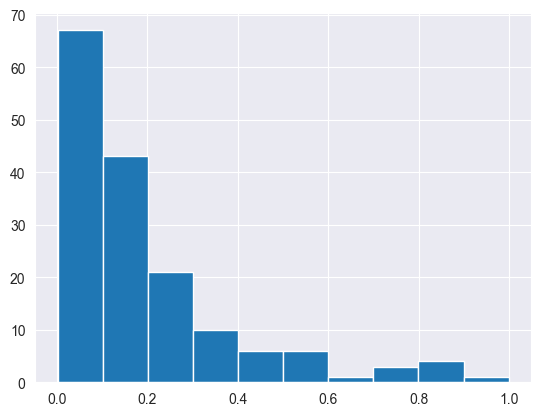

In [76]:
# seems to be less well behaved with respect to high-frequency symptoms
# try filtering exceptionally rare or common symptoms and re-running